Dylan Hastings

# 1. Binary Classification

### 1.1 Titanic, but correctly this time

Take your linear regression model from the workshop 3.3 on the titanic dataset.

Swap OLS for logistic regresssion and compare the classification model metrics (accuracy, ROC plot, F1, precision/recall).

How much better is logistic regression than OLS on binary data?

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy as sc
from scipy import stats
import statsmodels.api as sm
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
sns.set()

In [2]:
df = sns.load_dataset('titanic')

In [3]:
df['class'] = df['class'].astype('str')
df['deck'] = df['deck'].astype('str')

In [29]:
df.age = df.age.fillna(0.)
df['missing_age'] = (df.age == 0).astype(int)

In [34]:
cat_cols = [
    'class', 'sex', 'deck', 'embark_town',
    #'sibsp'#, 'who'
]

num_cols = ['age', 'fare', 'pclass']

X = df[num_cols + ['missing_age']].copy()

for c in cat_cols:
    X = X.join(pd.get_dummies(df[c], drop_first=True, prefix=c))

X = sm.add_constant(X)
y = df["survived"]

est = sm.OLS(y, X).fit(cov_type = 'HC2')
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               survived   R-squared:                       0.403
Model:                            OLS   Adj. R-squared:                  0.393
Method:                 Least Squares   F-statistic:                     126.1
Date:                Fri, 12 Feb 2021   Prob (F-statistic):          3.08e-214
Time:                        17:42:39   Log-Likelihood:                -391.86
No. Observations:                 891   AIC:                             815.7
Df Residuals:                     875   BIC:                             892.4
Df Model:                          15                                         
Covariance Type:                  HC2                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       1.0796      0.123      8.794      0.000       0.839       1.320
age                        -0.0051      0.001     -4.502      0.000      -0.007      -0.003
fare                        0.0002      0.000      0.465      0.642      -0.000       0.001
pclass                      0.0949      0.032      2.925      0.003       0.031       0.159
missing_age                -0.1760      0.049     -3.616      0.000      -0.271      -0.081
class_Second               -0.1426      0.047     -3.042      0.002      -0.234      -0.051
class_Third                -0.4210      0.042     -9.941      0.000      -0.504      -0.338
sex_male                   -0.4798      0.031    -15.568      0.000      -0.540      -0.419
deck_B                     -0.0209      0.139     -0.150      0.881      -0.294       0.252
deck_C                     -0.0983      0.142     -0.690      0.490      -0.378       0.181
deck_D                      0.0505      0.144      0.351      0.725      -0.231       0.332
deck_E                      0.1179      0.148      0.795      0.427      -0.173       0.409
deck_F                      0.0421      0.164      0.257      0.797      -0.279       0.363
deck_G                     -0.2784      0.323     -0.861      0.389      -0.912       0.355
deck_nan                   -0.1599      0.141     -1.135      0.256      -0.436       0.116
embark_town_Queenstown      0.0024      0.057      0.042      0.967      -0.109       0.114
embark_town_Southampton    -0.0924      0.036     -2.541      0.011      -0.164      -0.021
==============================================================================
Omnibus:                       40.689   Durbin-Watson:                   1.905
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               45.168
Skew:                           0.546   Prob(JB):                     1.56e-10
Kurtosis:                       3.160   Cond. No.                     8.73e+16
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC2)
[2] The smallest eigenvalue is 4.41e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [35]:
metrics.accuracy_score(y, np.around(ypred, decimals = 0))

0.8092031425364759

In [36]:
metrics.precision_score(y, np.around(ypred, decimals = 0))

0.7606060606060606

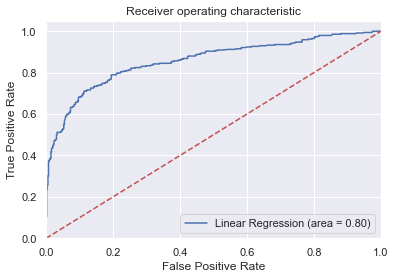

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
linreg = sm.OLS(y_train, X_train).fit(cov_type = 'HC2')
ypred = est.predict(X)
linreg_roc_auc = roc_auc_score(y, np.around(ypred, decimals = 0))
fpr, tpr, thresholds = roc_curve(y, linreg.predict(X))
plt.figure()
plt.plot(fpr, tpr, label='Linear Regression (area = %0.2f)' % linreg_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

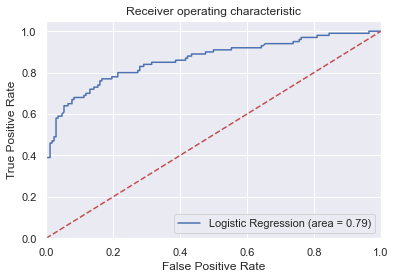

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
ypred = logreg.predict(X_test)
logit_roc_auc = roc_auc_score(y_test, np.around(ypred, decimals = 0))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [11]:
est = sm.Logit(y, X).fit(cov_type='HC2', method = 'powell', maxiter=9000)

C:\Users\plick\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
C:\Users\plick\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


Optimization terminated successfully.
         Current function value: 0.436889
         Iterations: 15
         Function evaluations: 2697


In [12]:
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      875
Method:                           MLE   Df Model:                           15
Date:                Tue, 09 Feb 2021   Pseudo R-squ.:                  0.3439
Time:                        17:07:39   Log-Likelihood:                -389.27
converged:                       True   LL-Null:                       -593.33
Covariance Type:                  HC2   LLR p-value:                 1.359e-77
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       4.3764   1.86e+07   2.35e-07      1.000   -3.64e+07    3.64e+07
age                        -0.0343      0.009     -3.982      0.000      -0.051      -0.017
fare                        0.0005      0.002      0.275      0.783      -0.003       0.004
pclass                     -0.2997   1.78e+07  -1.68e-08      1.000   -3.49e+07    3.49e+07
missing_age                -1.1420      0.344     -3.315      0.001      -1.817      -0.467
class_Second               -0.0369   1.81e+07  -2.04e-09      1.000   -3.55e+07    3.55e+07
class_Third                -0.9828   3.58e+07  -2.74e-08      1.000   -7.02e+07    7.02e+07
sex_male                   -2.5986      0.189    -13.734      0.000      -2.969      -2.228
deck_B                      0.0676      0.674      0.100      0.920      -1.253       1.388
deck_C                     -0.5040      0.666     -0.756      0.450      -1.810       0.802
deck_D                      0.4446      0.710      0.626      0.531      -0.948       1.837
deck_E                      0.9767      0.743      1.315      0.188      -0.479       2.432
deck_F                      0.3527      0.797      0.442      0.658      -1.210       1.916
deck_G                     -1.3695      1.258     -1.088      0.276      -3.836       1.096
deck_nan                   -0.8476      0.667     -1.271      0.204      -2.155       0.459
embark_town_Queenstown      0.0251      0.376      0.067      0.947      -0.711       0.761
embark_town_Southampton    -0.6262      0.248     -2.528      0.011      -1.112      -0.141
===========================================================================================
"""

In [13]:
ypred = est.predict(X)

In [14]:
metrics.accuracy_score(y, np.around(ypred, decimals = 0))

0.8148148148148148

In [15]:
metrics.precision_score(y, np.around(ypred, decimals = 0))

0.7739938080495357

Logistic regression is better than OLS in terms of accuracy, ROC plot, F1 and precision.

# 2. Intro To Computer Vision

The [MNIST dataset](https://en.wikipedia.org/wiki/MNIST_database) is a classic in computer vision. It's a database of manually written digits (from 0 to 9) scanned into a 28x28 pixel image.

The `X` matrix is 784 numbers (28x28) with numbers saying how dark the pixel is. The `y` variable is the number. The task is to use the images to do optical recognition.

You can fetch the dataset with the following command:

```
from sklearn.datasets import fetch_openml
fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)
```

Use sklearn's logistic regression and any of the tricks you want to boost predictive accuracy. Here's a few notes:

- Use the sklearn `train_test_split` we saw in class to keep some holdout data to test on.

- You can use whatever sklearn preprocessing you think is relevant. Here's a few: 
```
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
```

- Since there's many features (especially if you use data augmentation like polynomial features), this is a good time to use regularization. Try to find the best regularization parameters possible.

- You should be able to get at least 80% on a test set size of 10_000

In [69]:
from sklearn.datasets import fetch_openml
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [99]:
logreg = LogisticRegression(max_iter=5000)
logreg.fit(X_train, y_train)

C:\Users\plick\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=5000)

In [58]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.92


The code below is adapted from:

https://machinelearningmastery.com/how-to-develop-a-convolutional-neural-network-from-scratch-for-mnist-handwritten-digit-classification/

In [194]:
from keras.datasets import mnist
from keras.utils import to_categorical
from sklearn.model_selection import KFold
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.optimizers import SGD
from matplotlib import pyplot

In [195]:
def load_dataset():
    # load dataset
    (trainX, trainY), (testX, testY) = mnist.load_data()
    # reshape dataset to have a single channel
    trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
    testX = testX.reshape((testX.shape[0], 28, 28, 1))
    # one hot encode target values
    trainY = to_categorical(trainY)
    testY = to_categorical(testY)
    return trainX, trainY, testX, testY

In [196]:
def prep_pixels(train, test):
    train_norm = train.astype('float32')
    test_norm = test.astype('float32')
    # normalize to range 0-1
    train_norm = train_norm / 255.0
    test_norm = test_norm / 255.0
    return train_norm, test_norm

In [197]:
# define cnn model
def define_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(10, activation='softmax'))
    # compile model
    opt = SGD(lr=0.01, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [198]:
# evaluate a model using k-fold cross-validation
def evaluate_model(dataX, dataY, n_folds=5):
    scores, histories = list(), list()
    # prepare cross validation
    kfold = KFold(n_folds, shuffle=True, random_state=1)
    # enumerate splits
    for train_ix, test_ix in kfold.split(dataX):
        # define model
        model = define_model()
        # select rows for train and test
        trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
        # fit model
        history = model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY), verbose=0)
        # evaluate model
        _, acc = model.evaluate(testX, testY, verbose=0)
        print('> %.3f' % (acc * 100.0))
        # stores scores
        scores.append(acc)
        histories.append(history)
    return scores, histories

In [199]:
# plot diagnostic learning curves
def summarize_diagnostics(histories):
    for i in range(len(histories)):
        # plot loss
        pyplot.subplot(2, 1, 1)
        pyplot.title('Cross Entropy Loss')
        pyplot.plot(histories[i].history['loss'], color='blue', label='train')
        pyplot.plot(histories[i].history['val_loss'], color='orange', label='test')
        # plot accuracy
        pyplot.subplot(2, 1, 2)
        pyplot.title('Classification Accuracy')
        pyplot.plot(histories[i].history['accuracy'], color='blue', label='train')
        pyplot.plot(histories[i].history['val_accuracy'], color='orange', label='test')
        pyplot.show()

In [200]:
# summarize model performance
def summarize_performance(scores):
    # print summary
    print('Accuracy: mean=%.3f std=%.3f, n=%d' % (mean(scores)*100, std(scores)*100, len(scores)))
    # box and whisker plots of results
    pyplot.boxplot(scores)
    pyplot.show()

In [201]:
# run the test harness for evaluating a model
def run_test_harness():
    # load dataset
    trainX, trainY, testX, testY = load_dataset()
    # prepare pixel data
    trainX, testX = prep_pixels(trainX, testX)
    # evaluate model
    scores, histories = evaluate_model(trainX, trainY)
    # learning curves
    summarize_diagnostics(histories)
    # summarize estimated performance
    summarize_performance(scores)

> 98.683
> 98.750
> 98.575
> 98.800
> 98.558


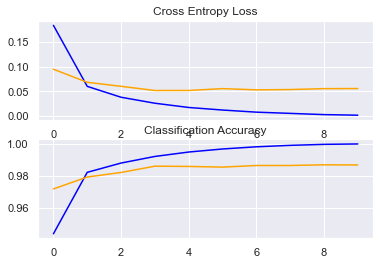

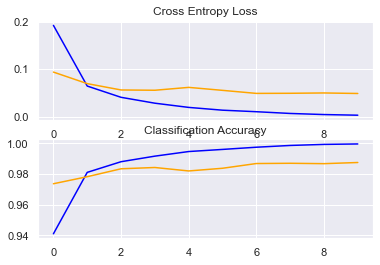

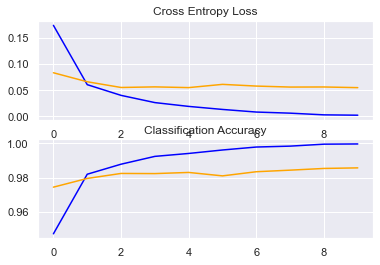

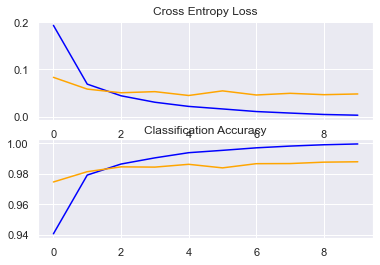

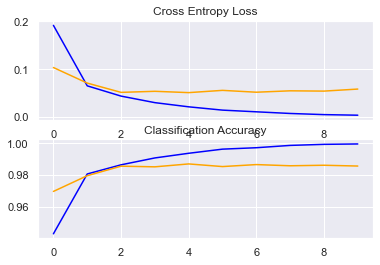

NameError: name 'mean' is not defined

In [202]:
# entry point, run the test harness
run_test_harness()

# 3. Counting Poissons

The `data/fish.csv` is a data set of camping trips taken by 250 groups of people.

- The campers may or may not have done some fishing during their trip.
- If a group did some fishing, they would have caught zero or mor fish.
- We want to estimate not only how many fish were caught (if there was fishing done by a camping group), but also the probability that the camping group caught any fish at all.

Here's info on the columns:

**FISH_COUNT:** The number of fish that were caught. This will be our dependent variable y.

**LIVE_BAIT:** A binary variable indicating whether live bait was used.

**CAMPER:** Whether the fishing group used a camper van.

**PERSONS:** Total number of people in the fishing group. Note that in some groups, none of them may have fished.

**CHILDREN:** The number of children in the camping group.

Your task is to predict the number of fish caught (FISH_COUNT) by a camping group based on the values of LIVE_BAIT, CAMPER, PERSONS and CHILDREN variables.

Use what we learned on count variables and zero-inflated datasets to achieve the best model you can.

Interpret the models you used to give an analysis of each feature's effect on the predicted fish caught.

**N.B.** Please appreciate the effort I went through to find a fish dataset for a count problem pun.

In [16]:
df = pd.read_csv('data/fish.csv')
df

,LIVE_BAIT,CAMPER,PERSONS,CHILDREN,FISH_COUNT
0,0,0,1,0,0
1,1,1,1,0,0
2,1,0,1,0,0
3,1,1,2,1,0
4,1,0,1,0,1
...,...,...,...,...,...
245,1,1,2,0,0
246,1,1,4,3,0
247,1,1,2,1,0
248,1,1,3,2,0


In [17]:
X = df[['LIVE_BAIT', 'CAMPER', 'PERSONS', 'CHILDREN']].copy()

X = sm.add_constant(X)
y = df['FISH_COUNT']

In [18]:
X

,const,LIVE_BAIT,CAMPER,PERSONS,CHILDREN
0,1.0,0,0,1,0
1,1.0,1,1,1,0
2,1.0,1,0,1,0
3,1.0,1,1,2,1
4,1.0,1,0,1,0
...,...,...,...,...,...
245,1.0,1,1,2,0
246,1.0,1,1,4,3
247,1.0,1,1,2,1
248,1.0,1,1,3,2


In [19]:
# Stage 1
est1 = sm.Logit((y > 0).astype(int), sm.add_constant(X)).fit()
# Prep Stage 2
X['stage1'] = est1.predict(X)
# Stage 2
est2 = sm.Poisson(y, X).fit()
est2.summary()

Optimization terminated successfully.
         Current function value: 0.495335
         Iterations 6
Optimization terminated successfully.
         Current function value: 3.145454
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Poisson Regression Results                          
==============================================================================
Dep. Variable:             FISH_COUNT   No. Observations:                  250
Model:                        Poisson   Df Residuals:                      244
Method:                           MLE   Df Model:                            5
Date:                Tue, 09 Feb 2021   Pseudo R-squ.:                  0.5228
Time:                        17:07:46   Log-Likelihood:                -786.36
converged:                       True   LL-Null:                       -1647.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.1977      0.266    -12.018      0.000      -3.719      -2.676
LIVE_BAIT      1.9649      0.250      7.858      0.000       1.475       2.455
CAMPER         1.0589      0.119      8.895      0.000       0.826       1.292
PERSONS        1.4232      0.112     12.689      0.000       1.203       1.643
CHILDREN      -2.4239      0.231    -10.512      0.000      -2.876      -1.972
stage1        -2.1432      0.642     -3.339      0.001      -3.401      -0.885
==============================================================================
"""

# 5. Survival Question

The `data/telco_churn.csv` dataset comes from [here](https://www.kaggle.com/blastchar/telco-customer-churn) and here is the description:

**Context**

"Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs." [IBM Sample Data Sets]
Content

Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

The data set includes information about:

- Customers who left within the last month – the column is called Churn
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
- Demographic info about customers – gender, age range, and if they have partners and dependents


**5.1 StreamingTV churn**

The `Tenure` column is how long the customer lasted. Make the survival curve for both the group using StreamingTV and the one not using it in the dataset

![](streamingtv.png)


**5.2 Survival Regression**

Use either lifelines or statsmodels to implement a survival regression model predicting tenure. Don't forget to use the churn column as the event column.

In [90]:
df = pd.read_csv('data/telco_churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [91]:
df['Churn'] = df.Churn.replace(('Yes', 'No'), (1, 0))
df['Partner'] = df.Partner.replace(('Yes', 'No'), (1, 0))
df['Dependents'] = df.Dependents.replace(('Yes', 'No'), (1, 0))
df['PhoneService'] = df.PhoneService.replace(('Yes', 'No'), (1, 0))
df['PaperlessBilling'] = df.PaperlessBilling.replace(('Yes', 'No'), (1, 0))

In [92]:
cat_cols = [
    'DeviceProtection', 'StreamingTV',
    'Contract', 'PaymentMethod'
]

num_cols = [
    'SeniorCitizen', 'Partner', 'Dependents', 
    'PhoneService', 'PaperlessBilling', 'MonthlyCharges'
]

X = df[num_cols].copy()

for c in cat_cols:
    X = X.join(pd.get_dummies(df[c], drop_first=True, prefix=c))

#X = sm.add_constant(X)
y = df.tenure
churn = df.Churn

est = sm.PHReg(y, X, status=churn).fit()
est.summary()

C:\Users\plick\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


<class 'statsmodels.iolib.summary2.Summary'>
"""
                                        Results: PHReg
===============================================================================================
Model:                                PH Reg                  Sample size:                 7032
Dependent variable:                   tenure                  Num. events:                 1869
Ties:                                 Breslow                                                  
-----------------------------------------------------------------------------------------------
                                       log HR  log HR SE     HR      t     P>|t|  [0.025 0.975]
-----------------------------------------------------------------------------------------------
SeniorCitizen                         -0.0235       0.0563 0.9768  -0.4177 0.6762 0.8747 1.0908
Partner                               -0.5295       0.0549 0.5889  -9.6492 0.0000 0.5289 0.6558
Dependents                            -0.1427       0.0682 0.8670  -2.0934 0.0363 0.7586 0.9909
PhoneService                           0.4766       0.1155 1.6106   4.1254 0.0000 1.2842 2.0199
PaperlessBilling                       0.2217       0.0566 1.2481   3.9135 0.0001 1.1170 1.3947
MonthlyCharges                        -0.0078       0.0020 0.9922  -3.8591 0.0001 0.9883 0.9962
DeviceProtection_No internet service  -0.4853 9047029.9469 0.6155  -0.0000 1.0000 0.0000    inf
DeviceProtection_Yes                  -0.3145       0.0563 0.7302  -5.5902 0.0000 0.6539 0.8153
StreamingTV_No internet service       -0.4853 9047029.9469 0.6155  -0.0000 1.0000 0.0000    inf
StreamingTV_Yes                        0.0411       0.0621 1.0420   0.6619 0.5080 0.9225 1.1770
Contract_One year                     -1.8697       0.0862 0.1542 -21.6859 0.0000 0.1302 0.1826
Contract_Two year                     -3.6501       0.1620 0.0260 -22.5336 0.0000 0.0189 0.0357
PaymentMethod_Credit card (automatic) -0.0679       0.0906 0.9344  -0.7492 0.4537 0.7823 1.1160
PaymentMethod_Electronic check         0.6716       0.0710 1.9574   9.4609 0.0000 1.7031 2.2496
PaymentMethod_Mailed check             0.5281       0.0882 1.6958   5.9884 0.0000 1.4266 2.0158
===============================================================================================
Confidence intervals are for the hazard ratios
"""

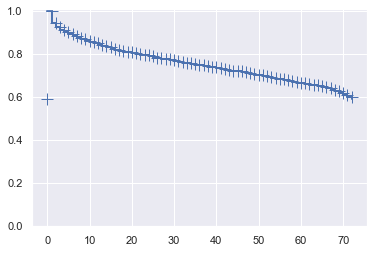

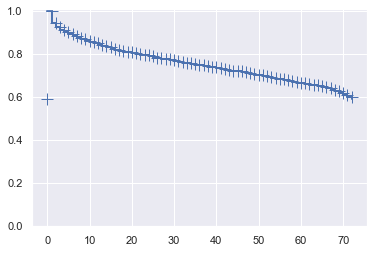

In [93]:
sm.SurvfuncRight(y, status=churn).plot()

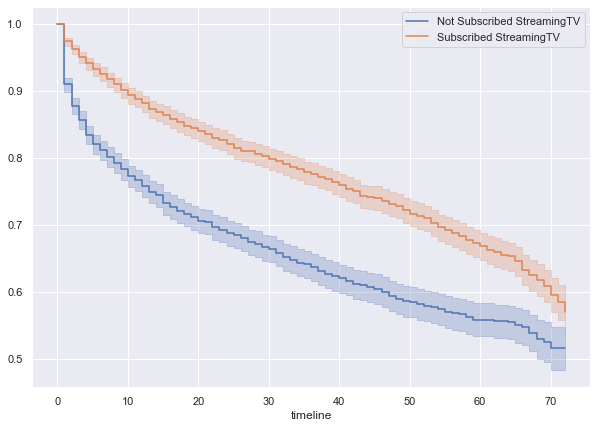

In [105]:
from lifelines import KaplanMeierFitter

T = df['tenure']
E = df['Churn']

groups = df['StreamingTV']
i1 = (groups == 'No')
i2 = (groups == 'Yes')

fig, ax = plt.subplots(figsize=(10,7))

kmf.fit(T[i1], E[i1], label = 'Not Subscribed StreamingTV')
a1 = kmf.plot()

kmf.fit(T[i2], E[i2], label='Subscribed StreamingTV')
kmf.plot(ax=a1)